In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import glob
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Activation, Convolution2D, Dropout, MaxPool2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [4]:
dir_name_train_NORMAL = 'dataset/Train/NORMAL'
dir_name_train_TUBERCULOSIS = 'dataset/Train/TUBERCULOSIS'

In [5]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(80, 40))
    for idx, img_path in enumerate(item_files):
        plt.subplot(3, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()

In [6]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    d0 = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)


Trainned data for NORMAL:

 ====== Images in:  dataset/Train/NORMAL
images_count:	493
min_width:	512
max_width:	512
min_height:	512
max_height:	512



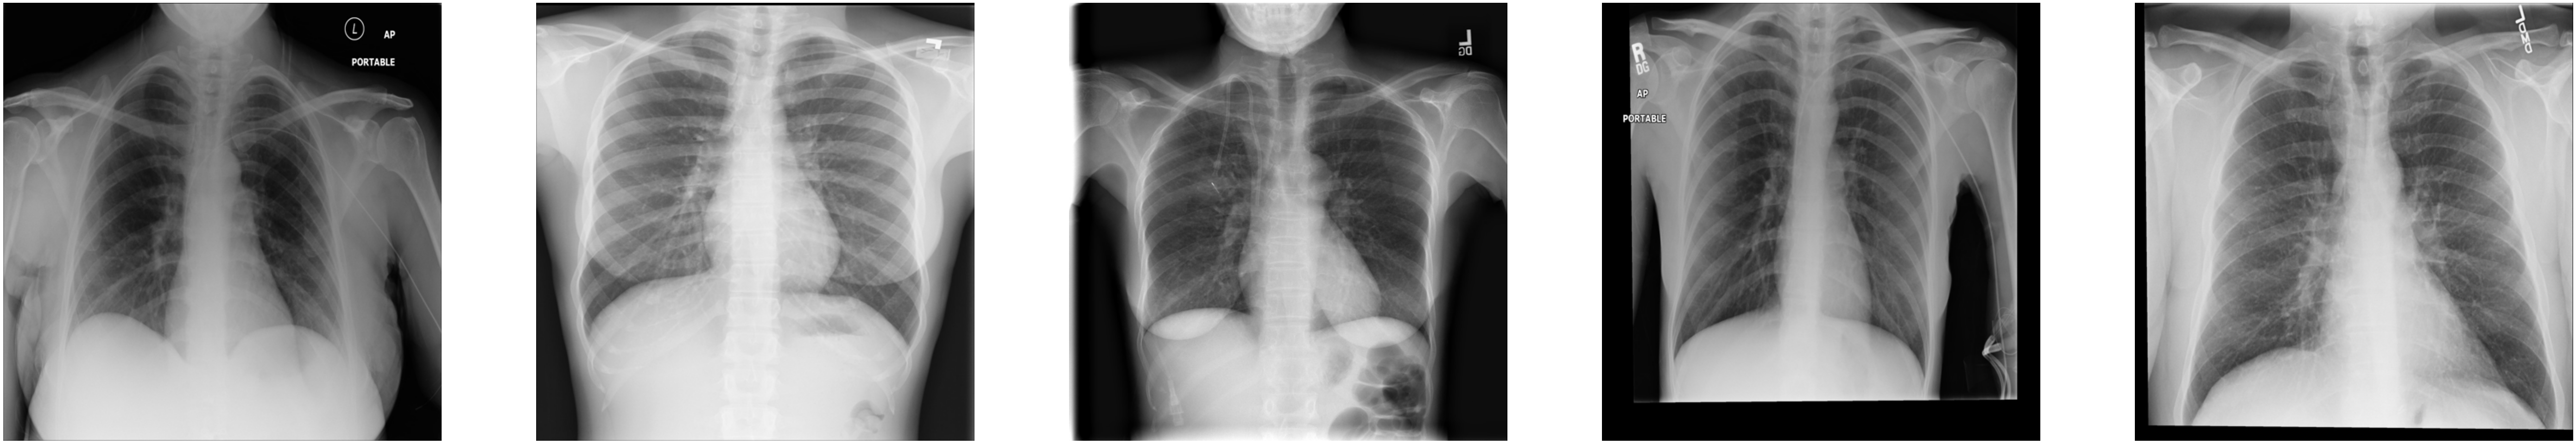

In [7]:
print("")
print("Trainned data for NORMAL:")
print("")
Images_details(dir_name_train_NORMAL)
print("")
plot_images(dir_name_train_NORMAL, 5) 


Trainned data for TUBERCULOSIS:

 ====== Images in:  dataset/Train/TUBERCULOSIS
images_count:	499
min_width:	512
max_width:	512
min_height:	512
max_height:	512



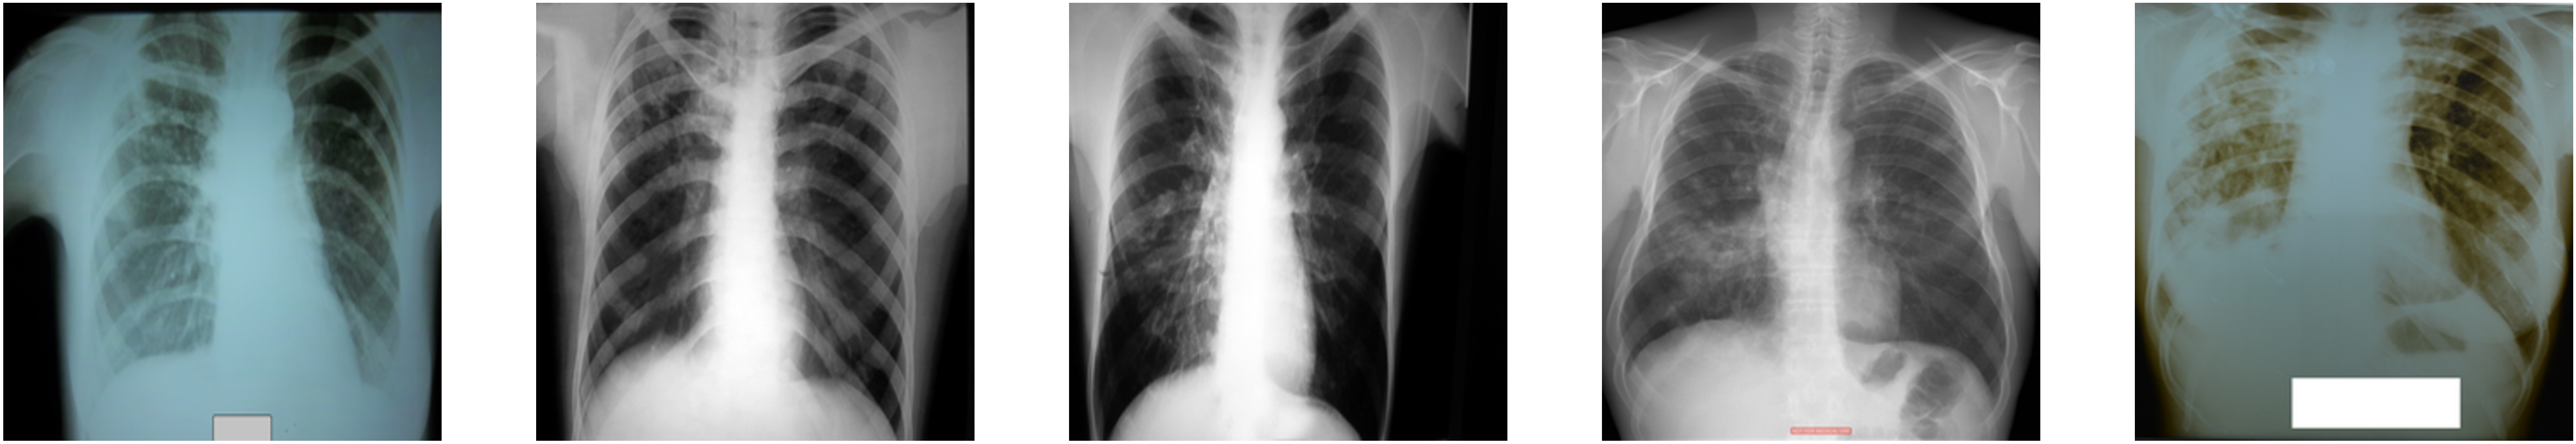

In [8]:
print("")
print("Trainned data for TUBERCULOSIS:")
print("")
Images_details(dir_name_train_TUBERCULOSIS)
print("")
plot_images(dir_name_train_TUBERCULOSIS, 5) 

In [9]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('dataset/train',target_size=(256,256),batch_size=32,class_mode='categorical')

Found 992 images belonging to 2 classes.


In [10]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('dataset/test',target_size=(256,256),batch_size=32,class_mode='categorical')

Found 400 images belonging to 2 classes.


In [11]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(256,256,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))
Classifier.add(Dense(2, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
epochs = 10
batch_size = 64

In [13]:
#### Fitting the model
history = Classifier.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/10
15/15 [==============================] - 26s 2s/step - loss: 11.2164 - acc: 0.6292 - val_loss: 0.5546 - val_acc: 0.6562
Epoch 2/10
15/15 [==============================] - 17s 1s/step - loss: 0.5690 - acc: 0.7729 - val_loss: 0.4382 - val_acc: 0.8333
Epoch 3/10
15/15 [==============================] - 17s 1s/step - loss: 0.3209 - acc: 0.8562 - val_loss: 0.5115 - val_acc: 0.6927
Epoch 4/10
15/15 [==============================] - 16s 1s/step - loss: 0.4309 - acc: 0.8125 - val_loss: 0.8806 - val_acc: 0.5208
Epoch 5/10
15/15 [==============================] - 17s 1s/step - loss: 0.3412 - acc: 0.8583 - val_loss: 0.4311 - val_acc: 0.8281
Epoch 6/10
15/15 [==============================] - 16s 1s/step - loss: 0.2724 - acc: 0.8750 - val_loss: 0.9925 - val_acc: 0.5208
Epoch 7/10
15/15 [==============================] - 17s 1s/step - loss: 0.4435 - acc: 0.8188 - val_loss: 0.6353 - val_acc: 0.5312
Epoch 8/10
15/15 [==============================] - 17s 1s/step - loss: 0.3375 - acc: 0.8

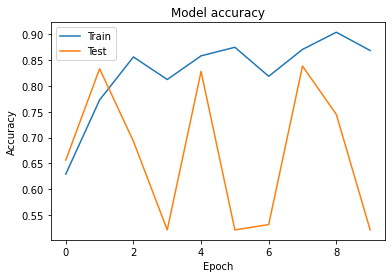

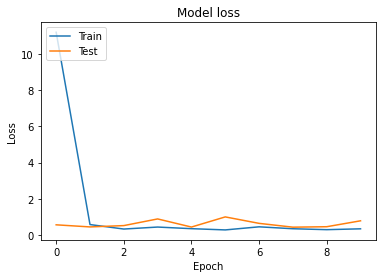

In [14]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()